# Bike Sharing Prediction 

# Data collection

Source: Machine Learning Repository UCI https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 

The data is a ZIP file containing two CSVs, hourly and daily count. Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv.

- **instant**: record index
- **dteday** : date
- **season** : season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not (extracted from [Web Link])
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) - hum: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users - registered: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

# Data preprocessing

In [1]:
#Import Libraries
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


#import missingno as msno
from datetime import datetime
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

hour_data=pd.read_csv('hour.csv')
hour_data.head()
hour_data.tail()

/Users/zn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31/12/12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31/12/12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31/12/12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31/12/12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31/12/12,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


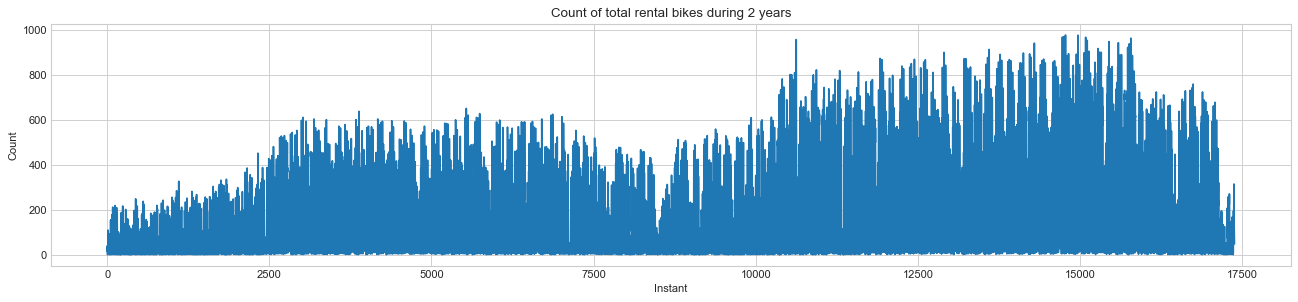

In [8]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 4), dpi=80, facecolor='w', edgecolor='k')

# Plot with differently-colored markers.
plt.plot('instant', 'cnt', data=hour_data)
plt.xlabel('Instant'); plt.ylabel('Count'); plt.title('Count of total rental bikes during 2 years');


Check things out by looking at all the features and data types.

In [46]:
hour_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [47]:
hour_data.shape

(17379, 17)

- 17379 observations
- 6 categorical variables put it as int64
- 4 numerical variables 
- 3 target variables

In [9]:
category_features = ['season', 'yr','mnth','hr','holiday', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

target = ['casual', 'registered', 'cnt']
casual= ['casual']
registered = ['registered']
cnt= ['cnt']
index =['instant', 'dteday']
features= category_features + number_features


In [10]:
#MISSING DATA
print(hour_data.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


# Descriptive analysis

In [11]:
#Numerical variables
print(hour_data[number_features].describe())
#Remember the stadarization
#temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
#- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
#- hum: Normalized humidity. The values are divided to 100 (max)
#- windspeed: Normalized wind speed. The values are divided to 67 (max)

#They are standarized


               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


/Users/zn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


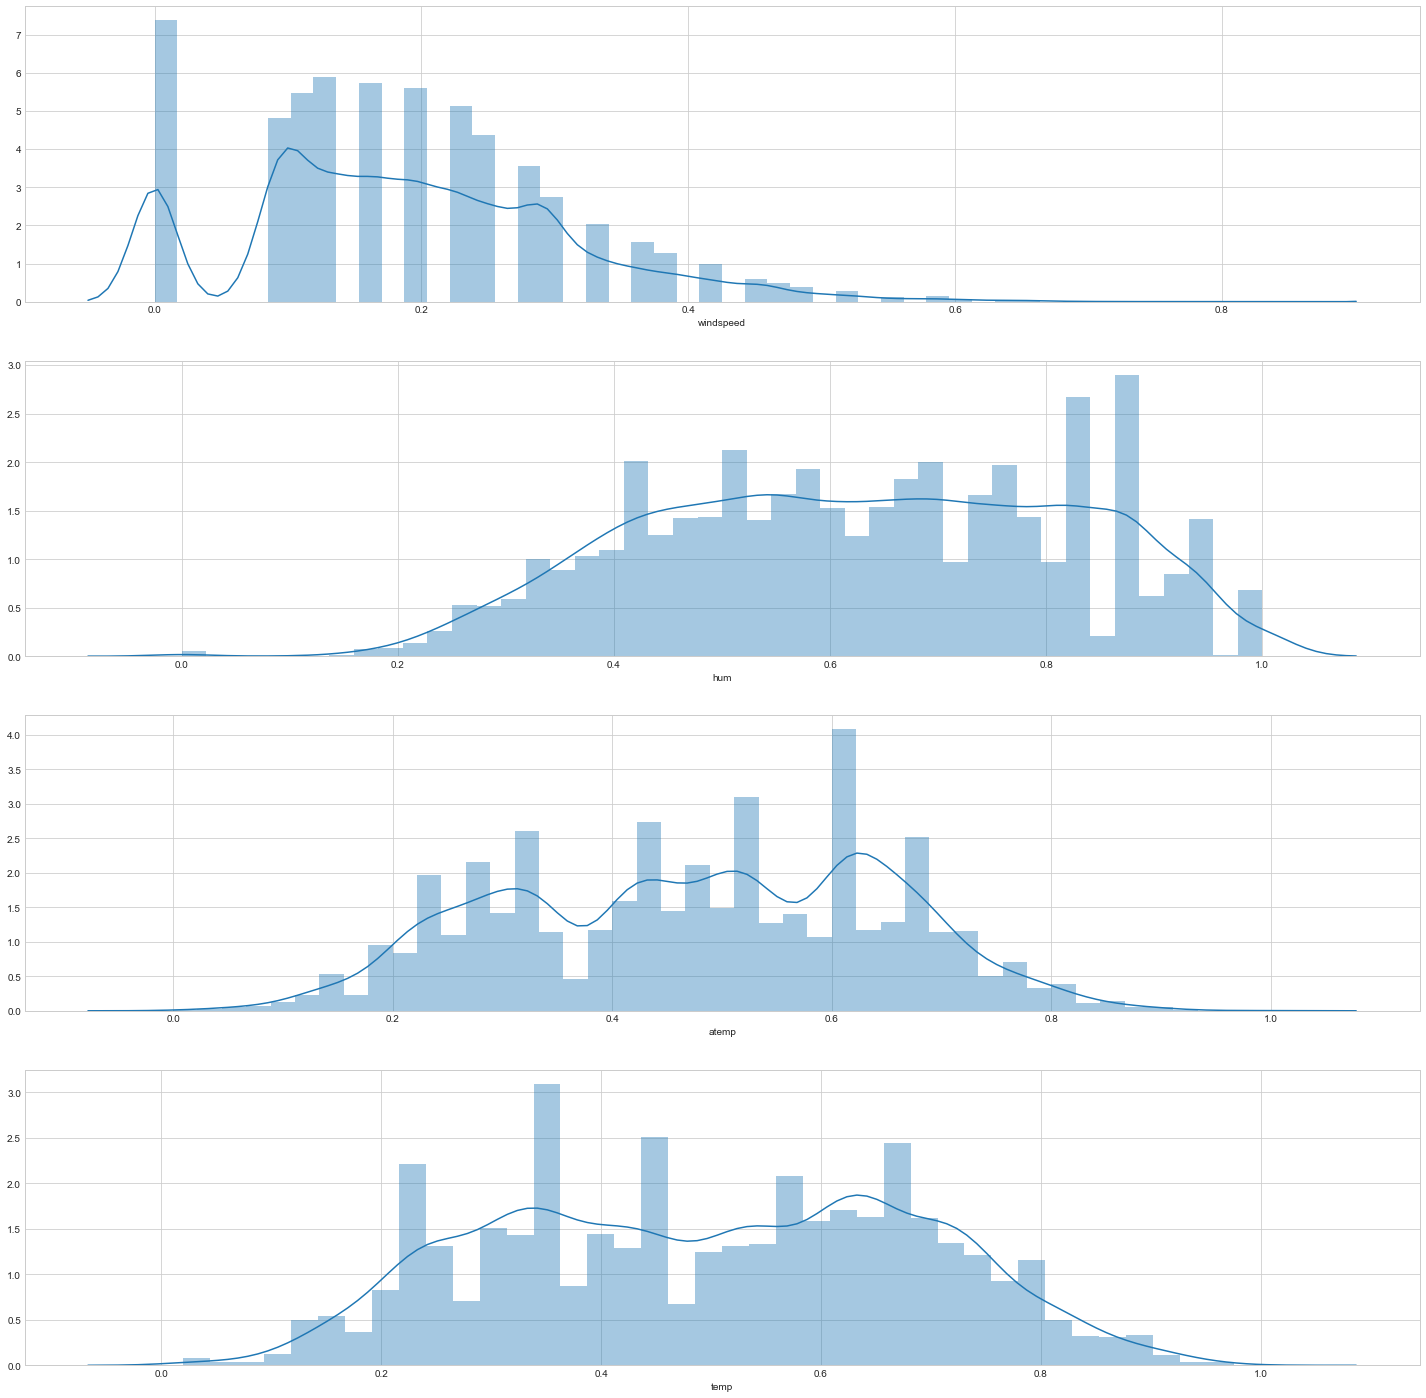

In [12]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(25, 25)
sns.distplot(hour_data[number_features[-1]], ax=axes[0])
sns.distplot(hour_data[number_features[-2]], ax=axes[1])
sns.distplot(hour_data[number_features[-3]], ax=axes[2])
sns.distplot(hour_data[number_features[-4]], ax=axes[3])

In [52]:
#Categorical variables

hour_data['season'] = pd.Categorical(hour_data.season)
hour_data['yr'] = pd.Categorical(hour_data.yr)
hour_data['mnth'] = pd.Categorical(hour_data.mnth)
hour_data['hr'] = pd.Categorical(hour_data.hr)
hour_data['holiday'] = pd.Categorical(hour_data.holiday)
hour_data['weekday'] = pd.Categorical(hour_data.weekday)
hour_data['workingday'] = pd.Categorical(hour_data.workingday)
hour_data['weathersit'] = pd.Categorical(hour_data.weathersit)
hour_data.dtypes
print(hour_data[category_features].astype('category').describe())


        season     yr   mnth     hr  holiday  weekday  workingday  weathersit
count    17379  17379  17379  17379    17379    17379       17379       17379
unique       4      2     12     24        2        7           2           4
top          3      1      7     17        0        6           1           1
freq      4496   8734   1488    730    16879     2512       11865       11413


# Descriptive analysis

[Text(0,0.5,'Count'),
 Text(0.5,0,''),
 Text(0.5,1,'Box Plot On Count Across Weather Situation')]

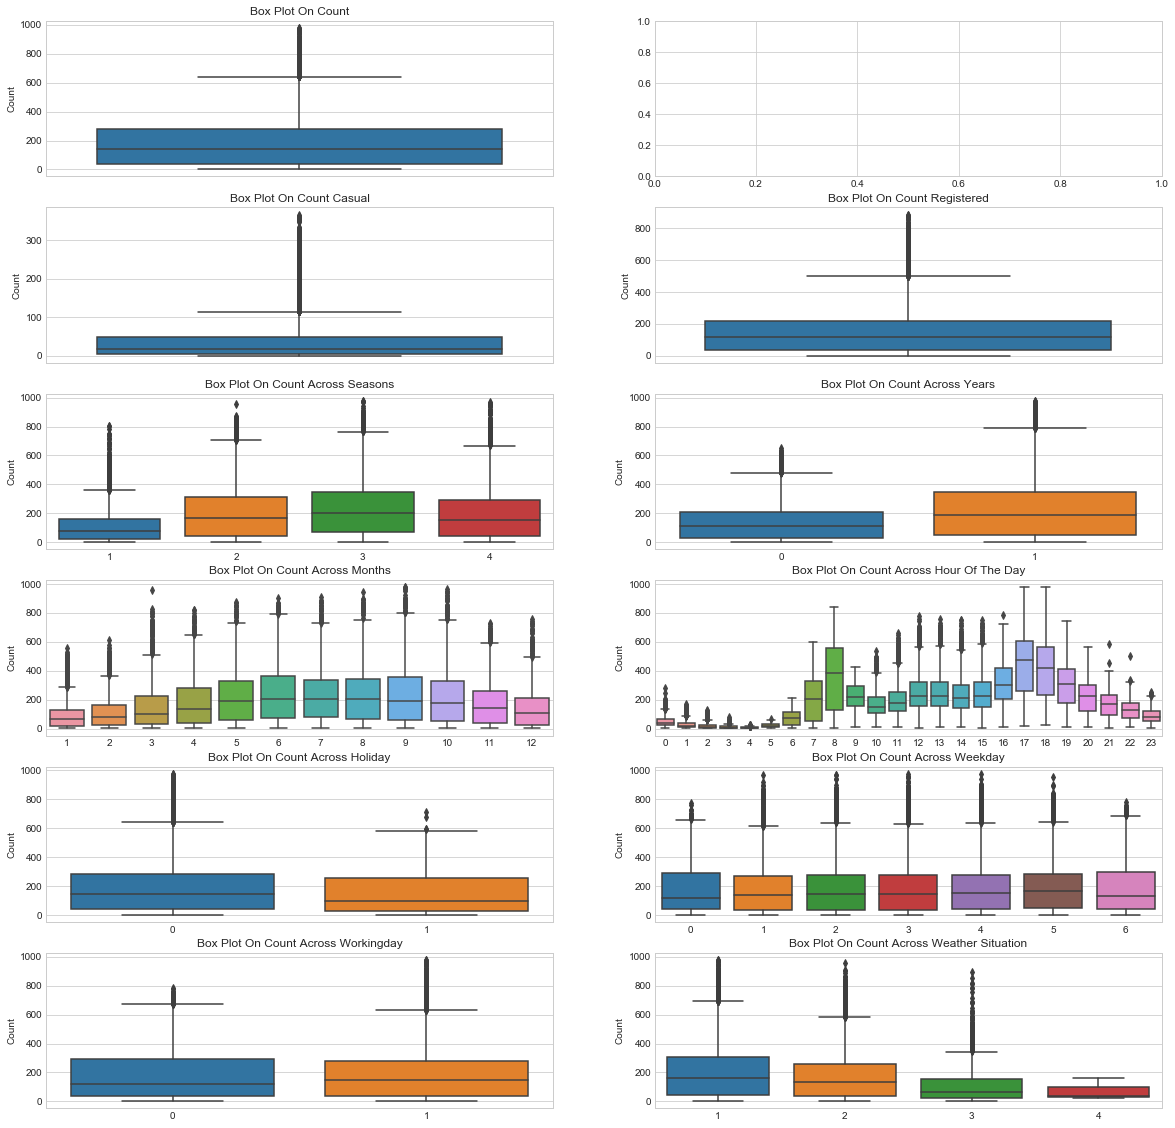

In [53]:
#Univariate dataviz
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(data=hour_data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=hour_data,y="casual",orient="v",ax=axes[1][0])
sns.boxplot(data=hour_data,y="registered",orient="v",ax=axes[1][1])
sns.boxplot(data=hour_data,y="cnt",x="season",orient="v",ax=axes[2][0])
sns.boxplot(data=hour_data,y="cnt",x="yr",orient="v",ax=axes[2][1])
sns.boxplot(data=hour_data,y="cnt",x="mnth",orient="v",ax=axes[3][0])
sns.boxplot(data=hour_data,y="cnt",x="hr",orient="v",ax=axes[3][1])
sns.boxplot(data=hour_data,y="cnt",x="holiday",orient="v",ax=axes[4][0])
sns.boxplot(data=hour_data,y="cnt",x="weekday",orient="v",ax=axes[4][1])
sns.boxplot(data=hour_data,y="cnt",x="workingday",orient="v",ax=axes[5][0])
sns.boxplot(data=hour_data,y="cnt",x="weathersit",orient="v",ax=axes[5][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[1][0].set(ylabel='Count',title="Box Plot On Count Casual")
axes[1][1].set(ylabel='Count',title="Box Plot On Count Registered")
axes[2][0].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Seasons")
axes[2][1].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Years")
axes[3][0].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Months")
axes[3][1].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[4][0].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Holiday")
axes[4][1].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Weekday")
axes[5][0].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Workingday")
axes[5][1].set(xlabel='', ylabel='Count',title="Box Plot On Count Across Weather Situation")

Fewest number of rents in winter and highest in summer (see months and season). 
Rent increase of rental in 2nd year. 
The hourly box plots show a local maximum at 8 am and one at 5 pm (work/school schedule). 
The working day, holiday day, and weekday box plots indicate similar behavior in bike rental. 
Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents. 

[Text(0,0.5,'Count'),
 Text(0.5,0,''),
 Text(0.5,1,'Box Plot On Casual Across Weather Situation')]

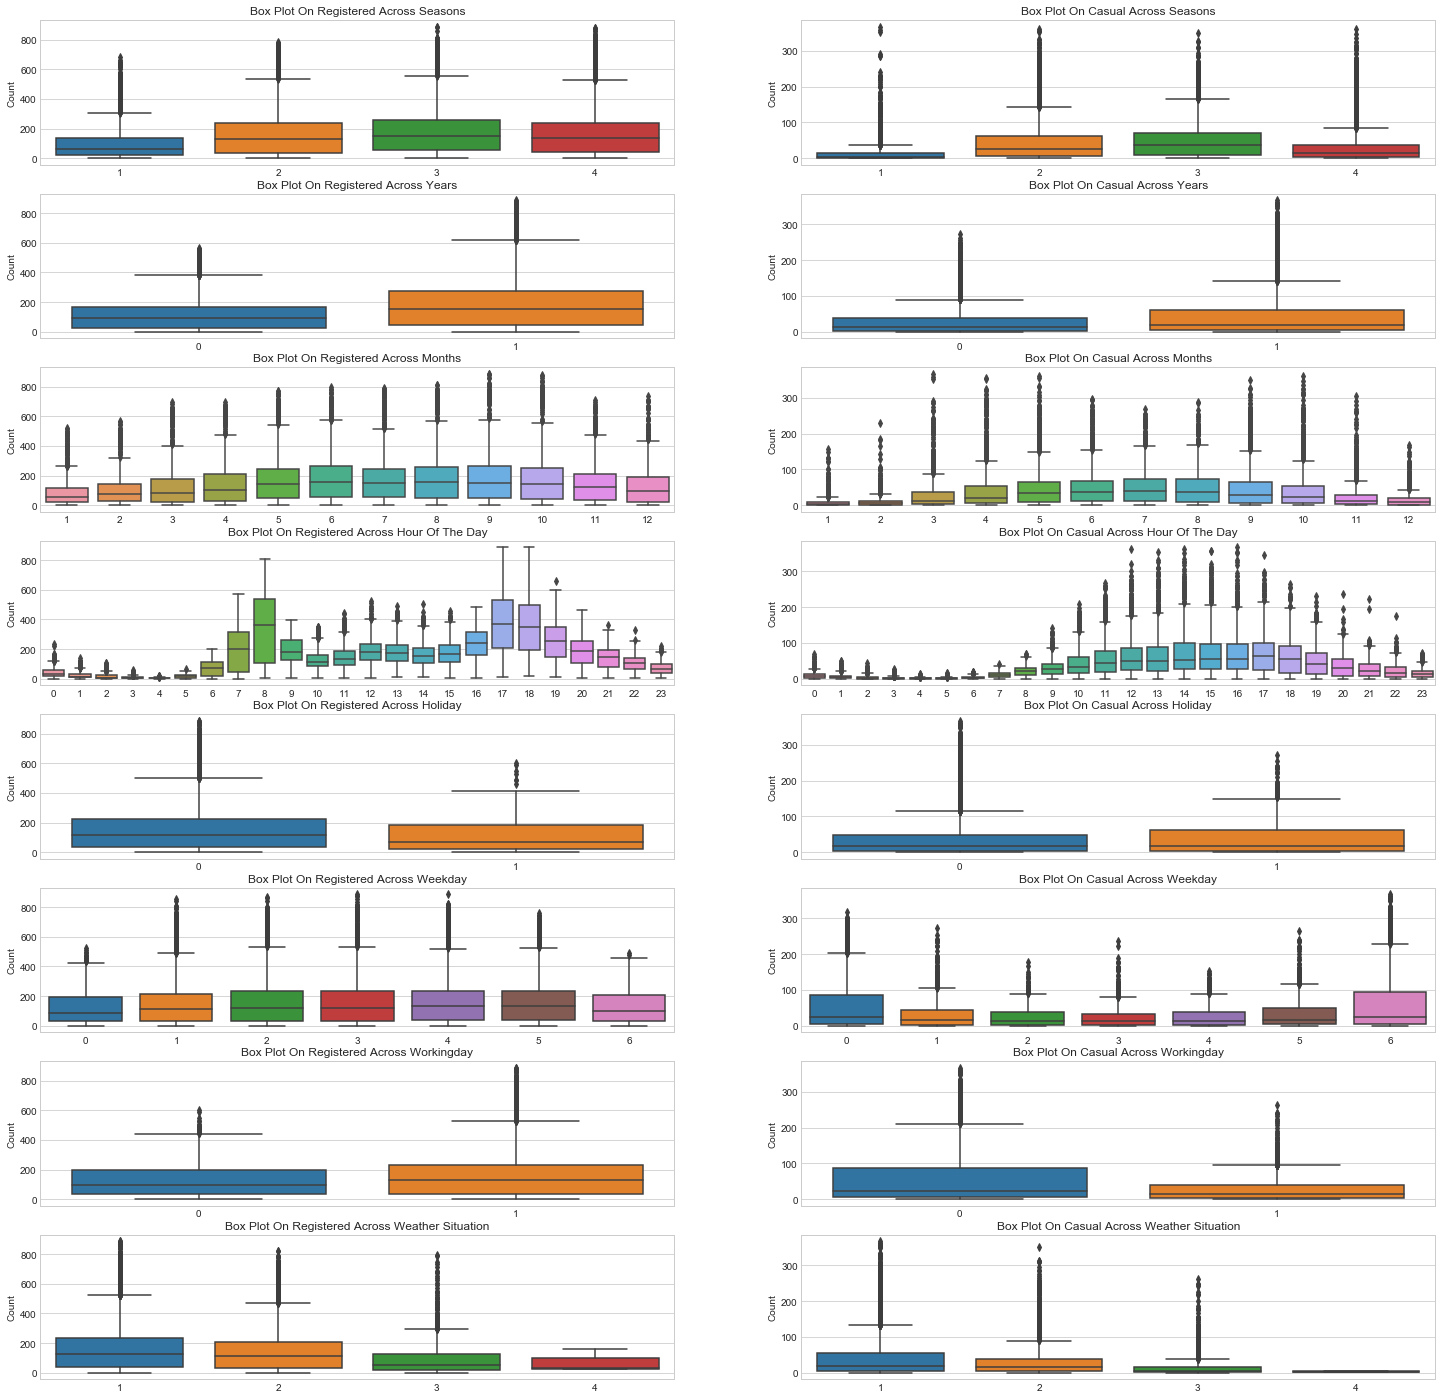

In [54]:
#Dataviz by registered vs. casual users
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25, 25)
sns.boxplot(data=hour_data,y="registered",x="season",orient="v",ax=axes[0][0])
sns.boxplot(data=hour_data,y="casual",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=hour_data,y="registered",x="yr",orient="v",ax=axes[1][0])
sns.boxplot(data=hour_data,y="casual",x="yr",orient="v",ax=axes[1][1])
sns.boxplot(data=hour_data,y="registered",x="mnth",orient="v",ax=axes[2][0])
sns.boxplot(data=hour_data,y="casual",x="mnth",orient="v",ax=axes[2][1])
sns.boxplot(data=hour_data,y="registered",x="hr",orient="v",ax=axes[3][0])
sns.boxplot(data=hour_data,y="casual",x="hr",orient="v",ax=axes[3][1])
sns.boxplot(data=hour_data,y="registered",x="holiday",orient="v",ax=axes[4][0])
sns.boxplot(data=hour_data,y="casual",x="holiday",orient="v",ax=axes[4][1])
sns.boxplot(data=hour_data,y="registered",x="weekday",orient="v",ax=axes[5][0])
sns.boxplot(data=hour_data,y="casual",x="weekday",orient="v",ax=axes[5][1])
sns.boxplot(data=hour_data,y="registered",x="workingday",orient="v",ax=axes[6][0])
sns.boxplot(data=hour_data,y="casual",x="workingday",orient="v",ax=axes[6][1])
sns.boxplot(data=hour_data,y="registered",x="weathersit",orient="v",ax=axes[7][0])
sns.boxplot(data=hour_data,y="casual",x="weathersit",orient="v",ax=axes[7][1])

axes[0][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Seasons")
axes[0][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Seasons")
axes[1][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Years")
axes[1][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Years")
axes[2][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Months")
axes[2][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Months")
axes[3][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Hour Of The Day")
axes[3][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Hour Of The Day")
axes[4][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Holiday")
axes[4][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Holiday")
axes[5][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Weekday")
axes[5][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Weekday")
axes[6][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Workingday")
axes[6][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Workingday")
axes[7][0].set(xlabel='', ylabel='Count',title="Box Plot On Registered Across Weather Situation")
axes[7][1].set(xlabel='', ylabel='Count',title="Box Plot On Casual Across Weather Situation")



Interpretation

Different behaviour by day and hour of registered and casual users.

# Distributions of target

/Users/zn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,''), Text(0.5,0,''), Text(0.5,1,'Distribution of Casual Users')]

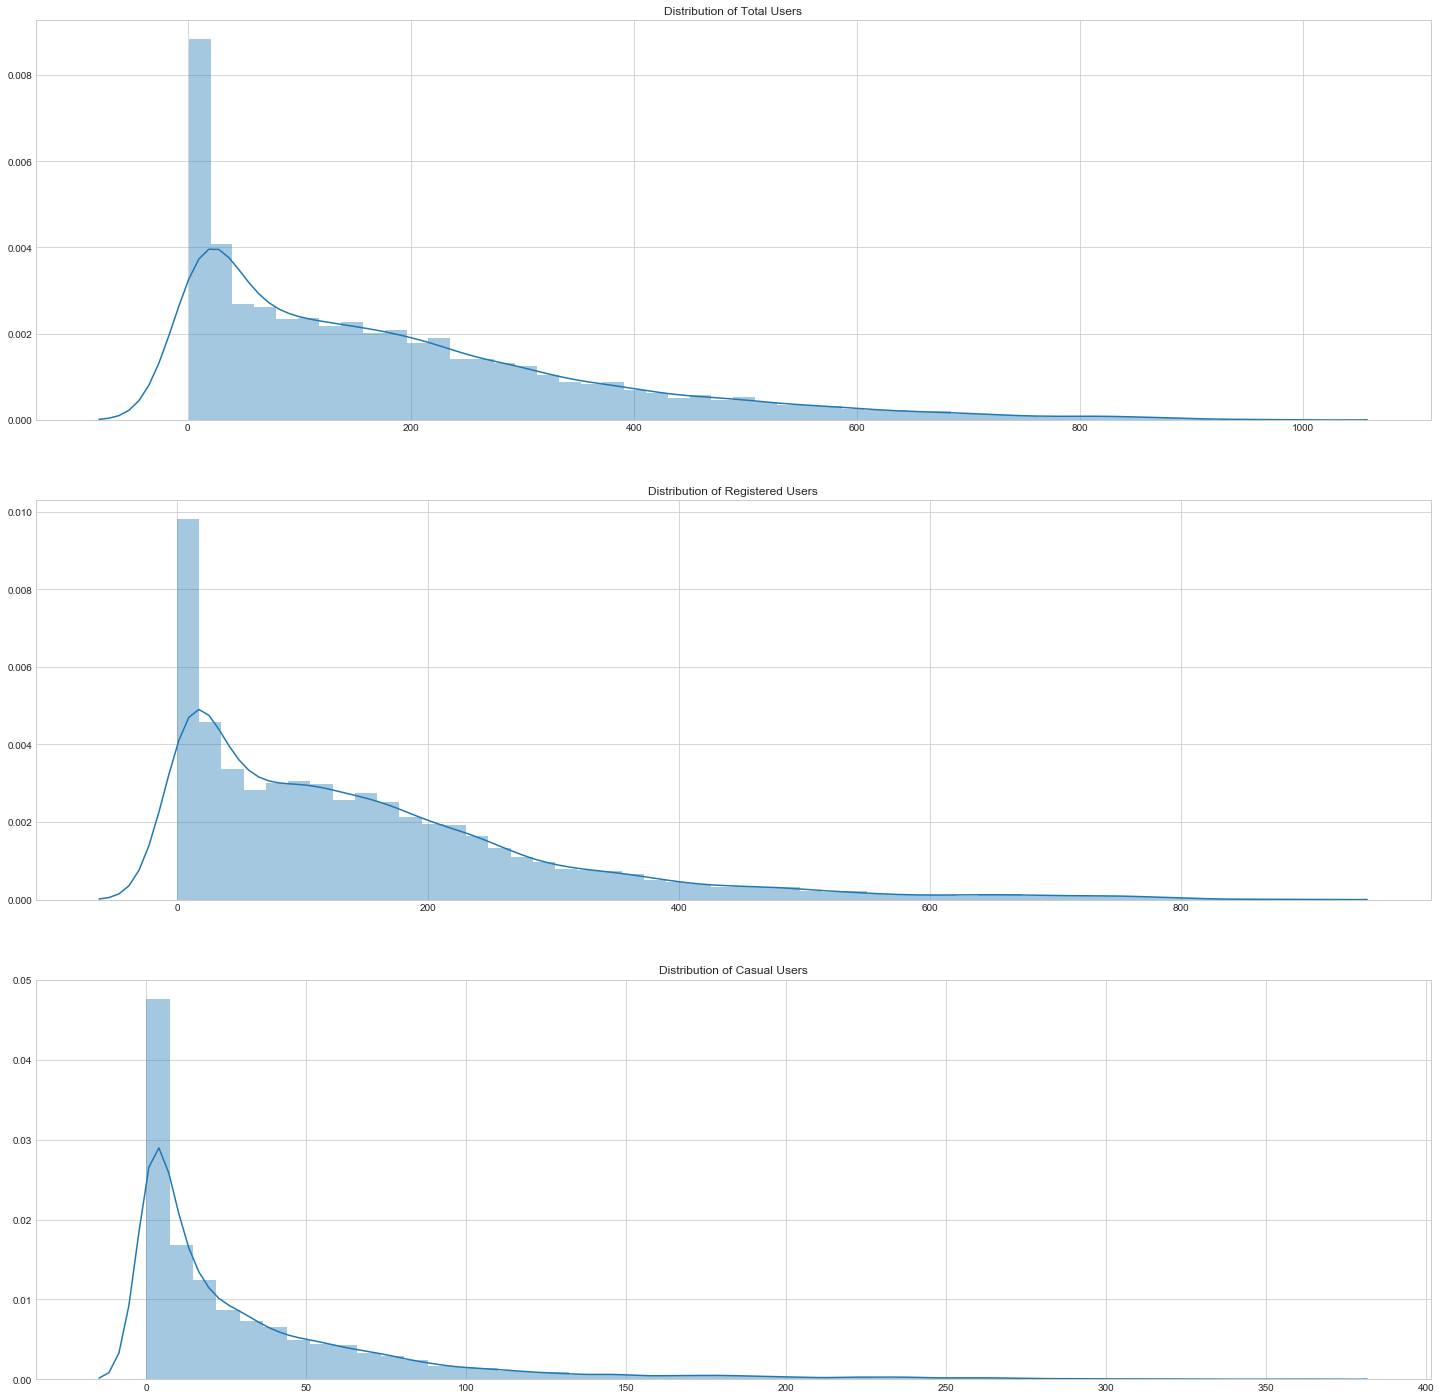

In [55]:
fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(25, 25)
#sns.distplot(hour_data[target[-1]], ax=axes[0])
sns.distplot(hour_data[cnt], ax=axes[0])
sns.distplot(hour_data[registered], ax=axes[1])
sns.distplot(hour_data[casual], ax=axes[2])

axes[0].set(xlabel='', ylabel='',title="Distribution of Total Users")
axes[1].set(xlabel='', ylabel='',title="Distribution of Registered Users")
axes[2].set(xlabel='', ylabel='',title="Distribution of Casual Users")


The distribution plots of the count, registered and causal values reveals that do not match a normal distribution. They are more likely a gamma distribution.


# Correlation analysis

In [15]:
matrix = hour_data[target+number_features].corr()
print(matrix)
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False



              casual  registered       cnt      temp     atemp       hum  \
casual      1.000000    0.506618  0.694564  0.459616  0.454080 -0.347028   
registered  0.506618    1.000000  0.972151  0.335361  0.332559 -0.273933   
cnt         0.694564    0.972151  1.000000  0.404772  0.400929 -0.322911   
temp        0.459616    0.335361  0.404772  1.000000  0.987672 -0.069881   
atemp       0.454080    0.332559  0.400929  0.987672  1.000000 -0.051918   
hum        -0.347028   -0.273933 -0.322911 -0.069881 -0.051918  1.000000   
windspeed   0.090287    0.082321  0.093234 -0.023125 -0.062336 -0.290105   

            windspeed  
casual       0.090287  
registered   0.082321  
cnt          0.093234  
temp        -0.023125  
atemp       -0.062336  
hum         -0.290105  
windspeed    1.000000  


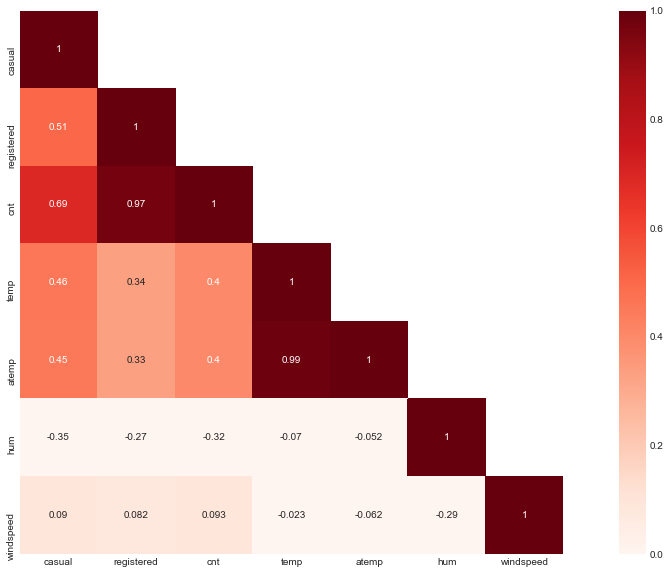

In [14]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")
#<matplotlib.axes._subplots.AxesSubplot at 0x19fb1e16ef0>


The variables "temp" and "atemp" are strongly correlated. The feature "atemp" is dismissed.

Cnt is the addition of registered and casual. Registered is strongly correlated with cnt but casual no. The predictions of cnt could be divide into 2 different predictions, registered and casual.


In [57]:
features.remove('atemp')

# Model building

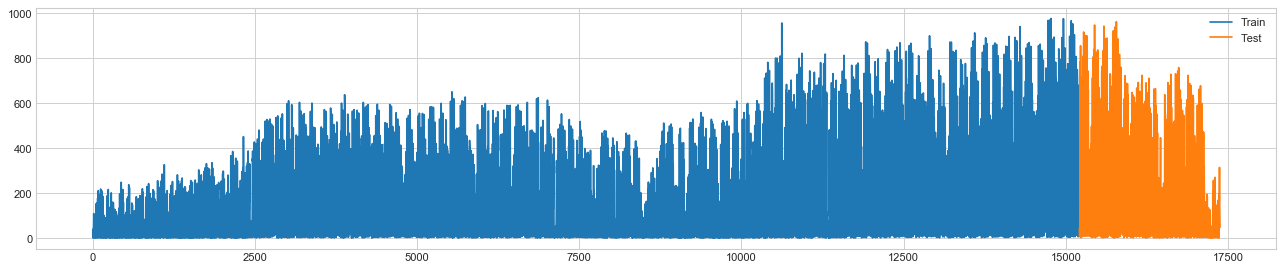

In [17]:
# Creation of training and validation sets
test = hour_data[hour_data.yr.eq(1) & (hour_data.mnth.eq(12)| hour_data.mnth.eq(11)|hour_data.mnth.eq(10))]
#valid.head()
#valid.tail()
index_test = test['instant'].iloc[0]    
train = hour_data[(hour_data['instant'] < index_test)]
#train.head()
#train.tail()

#from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 4), dpi=80, facecolor='w', edgecolor='k')

# Plot with differently-colored markers.
plt.plot('instant', 'cnt', data=train, label='Train')
plt.plot('instant', 'cnt', data=test, label='Test')
plt.legend()

# Split the data into training/testing sets
x_train = train[features].values
y0_train = train[cnt].values.ravel()
y1_train = train[casual].values.ravel()
y2_train = train[registered].values.ravel()

x_test = test[features].values
y0_test = test[cnt].values.ravel()
y1_test = test[casual].values.ravel()
y2_test = test[registered].values.ravel()


The characteristics of the given problem are:

- The target variables are quantities. 
- Small dataset.
- After descriptive analysis few features seem to be important.

With this characteristic the following methods are advised: Linear Regression, Ridge Regression, Support Vector Regression, Ensemble Regressor, Random Forest Regressor.



In [98]:
# The baseline predictions are the historical averages
train_M10 = train[train.yr.eq(0) & (train.mnth.eq(10))]
train_M11 = train[train.yr.eq(0) & (train.mnth.eq(11))]
train_M12 = train[train.yr.eq(0) & (train.mnth.eq(12))]

from statistics import median, mean 
baseline_preds_M10 = np.quantile(a, .5)
baseline_preds_M11 = median(train_M11[cnt].values.ravel())
baseline_preds_M12 = median(train_M12[cnt].values.ravel())

# Baseline errors, and display average baseline error
baseline_errors_M10 = abs(baseline_preds_M10 - train_M10[cnt].values.ravel())
baseline_errors_M11 = abs(baseline_preds_M11 - train_M11[cnt].values.ravel())
baseline_errors_M12 = abs(baseline_preds_M12 - train_M12[cnt].values.ravel())
print('Average baseline error M10: ', round(np.mean(baseline_errors_M10),2))
print('Average baseline error M11: ', round(np.mean(baseline_errors_M11),2))
print('Average baseline error M12: ', round(np.mean(baseline_errors_M12),2))


Average baseline error M10:  114.36
Average baseline error M11:  97.9
Average baseline error M12:  84.18


In [63]:
## Models to verify 

table0 = PrettyTable()
table0.field_names = ["Model CNT", "Mean Squared Error", "R² score"]
table1 = PrettyTable()
table1.field_names = ["Model CASUAL", "Mean Squared Error", "R² score"]
table2 = PrettyTable()
table2.field_names = ["Model REGISTERED", "Mean Squared Error", "R² score"]

models = [
    LinearRegression(),  
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300)
]

for model in models:
    model.fit(x_train, y0_train) 
    y0_pred = model.predict(x_test)
    mse0 = mean_squared_error(y0_test, y0_pred)
    score0 = model.score(x_test, y0_test)    
    table0.add_row([type(model).__name__, format(mse0, '.2f'), format(score0, '.2f')])

for model in models:
    model.fit(x_train, y1_train) 
    y1_pred = model.predict(x_test)
    mse1 = mean_squared_error(y1_test, y1_pred)
    score1 = model.score(x_test, y1_test)    
    table1.add_row([type(model).__name__, format(mse1, '.2f'), format(score1, '.2f')])    
    
for model in models:
    model.fit(x_train, y2_train) 
    y2_pred = model.predict(x_test)
    mse2 = mean_squared_error(y2_test, y2_pred)
    score2 = model.score(x_test, y2_test)    
    table2.add_row([type(model).__name__, format(mse2, '.2f'), format(score2, '.2f')])    

    
print(table0, table1, table2)




+-----------------------+--------------------+----------+
|       Model CNT       | Mean Squared Error | R² score |
+-----------------------+--------------------+----------+
|    LinearRegression   |      28638.54      |   0.30   |
|      SGDRegressor     |      30871.70      |   0.24   |
|         Lasso         |      28696.71      |   0.29   |
|       ElasticNet      |      33518.98      |   0.18   |
|         Ridge         |      28642.17      |   0.30   |
|          SVR          |      32094.87      |   0.21   |
|          SVR          |      27994.28      |   0.31   |
|    BaggingRegressor   |      5720.80       |   0.86   |
|    BaggingRegressor   |      36601.88      |   0.10   |
|         NuSVR         |      27292.95      |   0.33   |
| RandomForestRegressor |      5173.37       |   0.87   |
+-----------------------+--------------------+----------+ +-----------------------+--------------------+----------+
|      Model CASUAL     | Mean Squared Error | R² score |
+-------------

# Random Forest

In [100]:
#Evaluation CASUAL
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MAE","MSE", 'RMSLE', "R² score", "Accuracy"]

# Model training
model = RandomForestRegressor( random_state=0, n_estimators=300)
model.fit(x_train, y0_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)    
    errors= pred-y
    mae = np.mean(errors)
    mse = mean_squared_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))
    mape = 100 * (errors / y)
    accuracy = 100 - np.mean(mape)
    table.add_row([type(model).__name__, dataset,  format(mae, '.2f'), format(mse, '.2f'), format(rmsle, '.2f'), format(score, '.2f'), format(accuracy, '.2f')])
    
evaluate(x_train, y0_train, 'training')
evaluate(x_test, y0_test, 'testing')


print(table)

+-----------------------+----------+-------+---------+-------+----------+----------+
|         Model         | Dataset  |  MAE  |   MSE   | RMSLE | R² score | Accuracy |
+-----------------------+----------+-------+---------+-------+----------+----------+
| RandomForestRegressor | training |  0.39 |  208.97 |  0.15 |   0.99   |  93.84   |
| RandomForestRegressor | testing  | -8.83 | 5173.37 |  0.47 |   0.87   |  79.01   |
+-----------------------+----------+-------+---------+-------+----------+----------+


Our average estimate of the testing set is off by 9 degrees. That is more than a 90 degree average improvement over the baseline. This seem to be significant, but we must take care about a better future baseline.

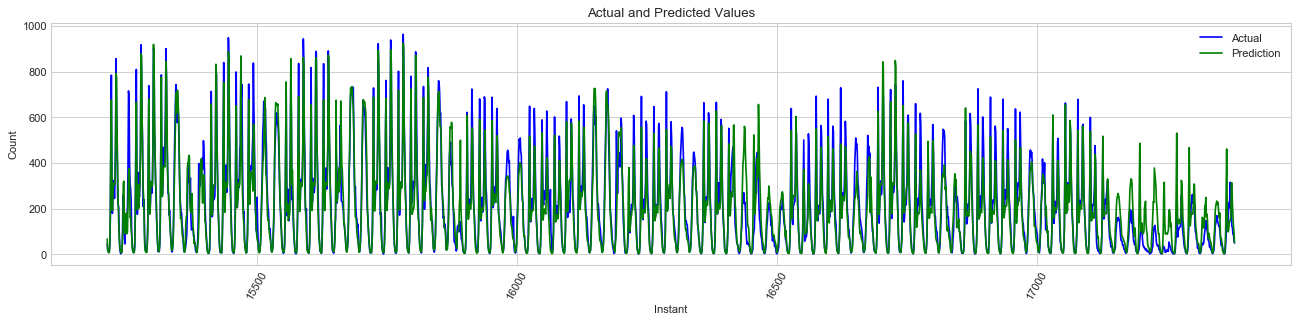

In [137]:
df = pd.DataFrame({ 'Index': test['instant'], 'Actual': y0_test.flatten(), 'Predicted': y0_pred.flatten()})
# Plot the actual values
figure(num=None, figsize=(20, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Index'], df['Actual'], 'b-', label = 'Actual')
# Plot the predicted values
plt.plot(df['Index'], df['Predicted'], '-g', label = 'Prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Instant'); plt.ylabel('Count'); plt.title('Actual and Predicted Values');

In [139]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hr (0.609736)
2. feature temp (0.161307)
3. feature yr (0.072224)
4. feature workingday (0.056176)
5. feature hum (0.030500)
6. feature weathersit (0.017173)
7. feature mnth (0.016790)
8. feature weekday (0.012380)
9. feature season (0.011527)
10. feature windspeed (0.010351)
11. feature holiday (0.001836)


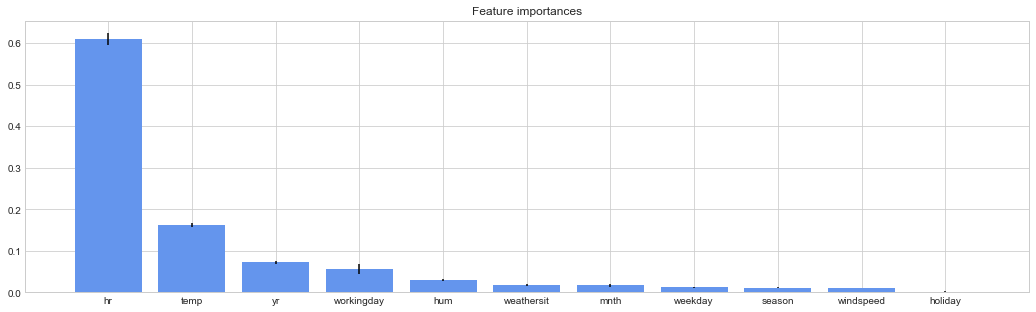

In [140]:
# Plot the feature importances of the forest
plt.figure(figsize=(18,5))
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_test.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_test.shape[1]])
plt.show()